In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer


pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## 1. Get the numerical variables from our dataset.

In [3]:
numerical_df = customer_df.select_dtypes("number")

## 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

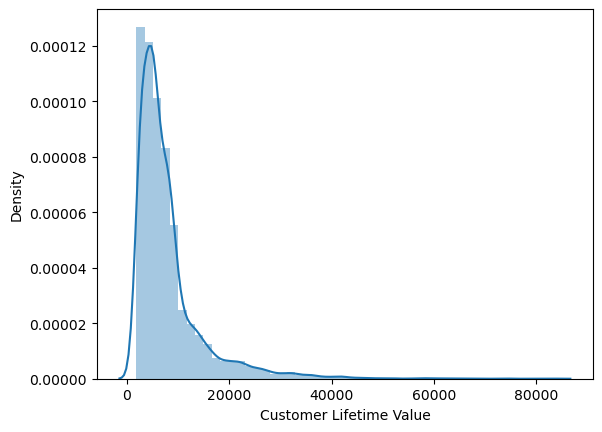

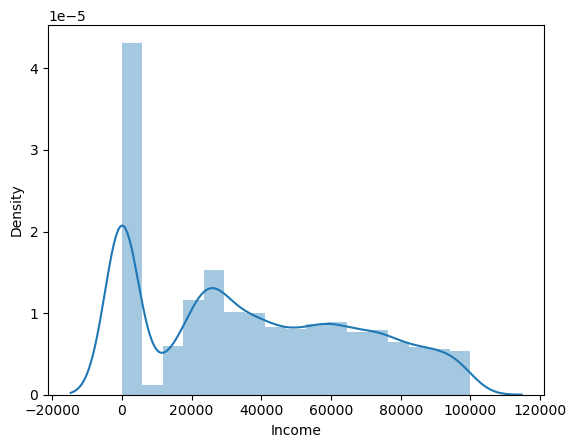

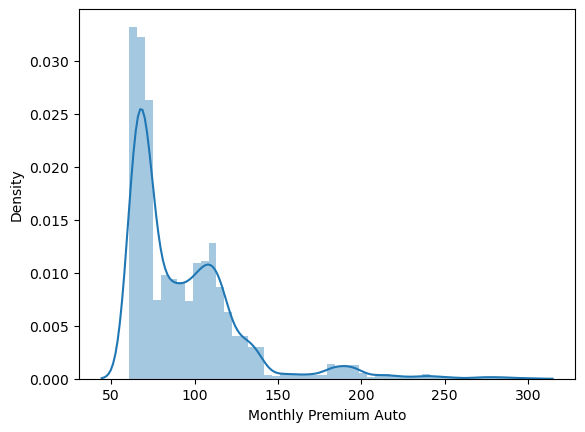

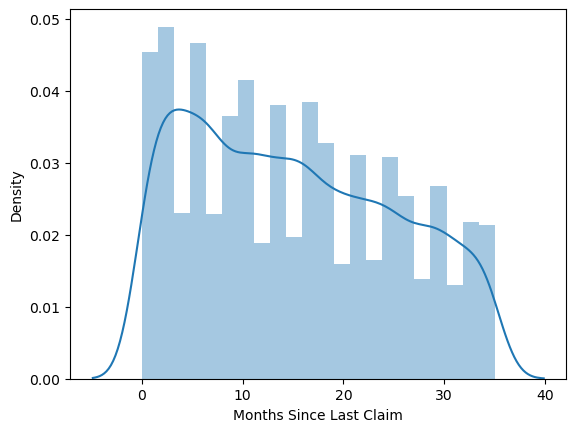

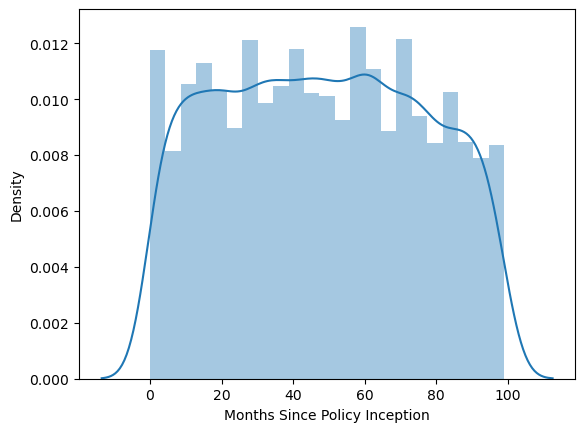

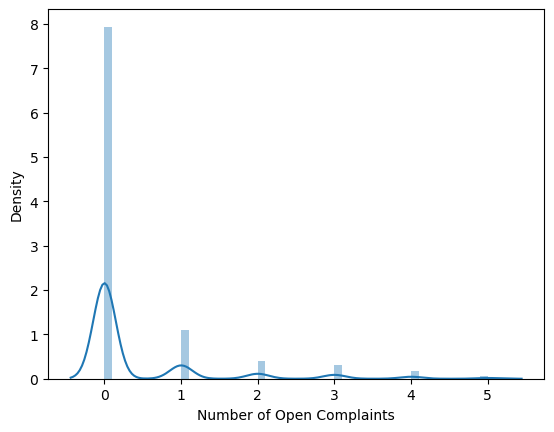

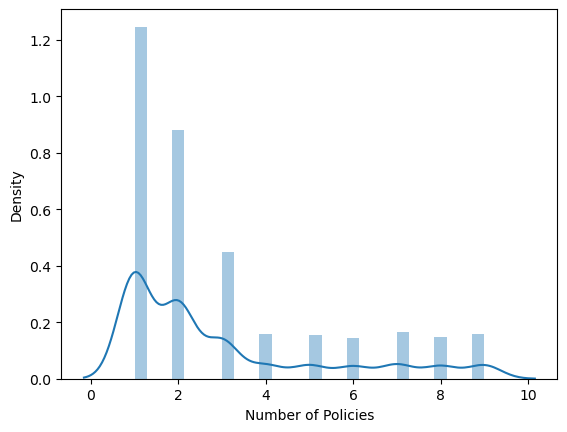

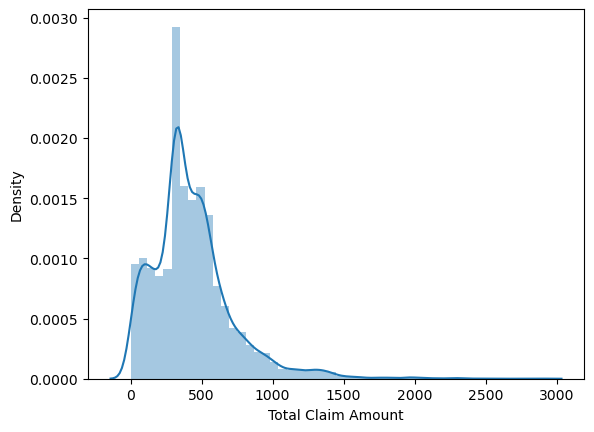

In [4]:
for col in numerical_df.columns:
    sns.distplot(numerical_df[col])
    plt.show()

Customer Lifetime Value: normal, bell-shaped distribution when we remove outliers, with them there is a long right skewness (outliers with high value) - data is asymmetrical, leaning towards higher values
Income: we can see a big spike for customers with no income (plus some with negative income - to be checked)
Monthly Premium Auto: exponential distribution, long right skewness, outliers present 
Total Claim Amount: normally distributed but long right skewness, outliers present

## 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

### Log transformation

In [5]:
numericals_log = numerical_df.applymap(lambda x: np.log(x+1))

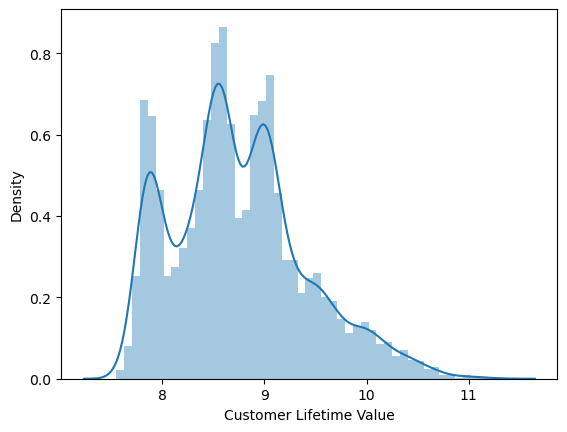

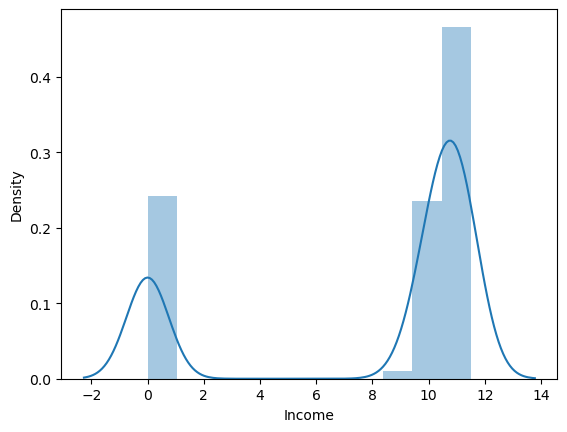

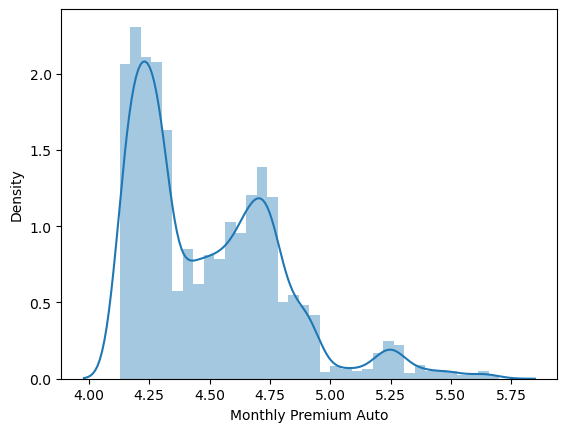

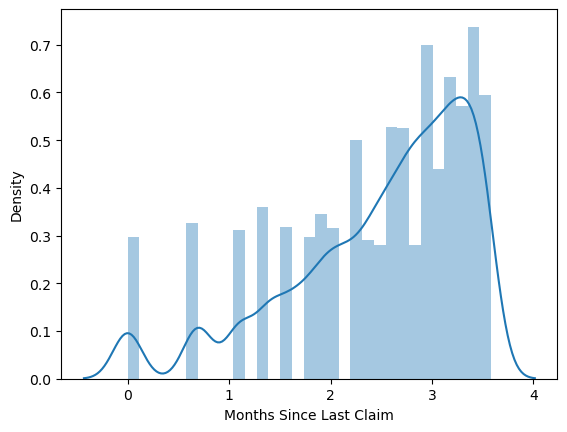

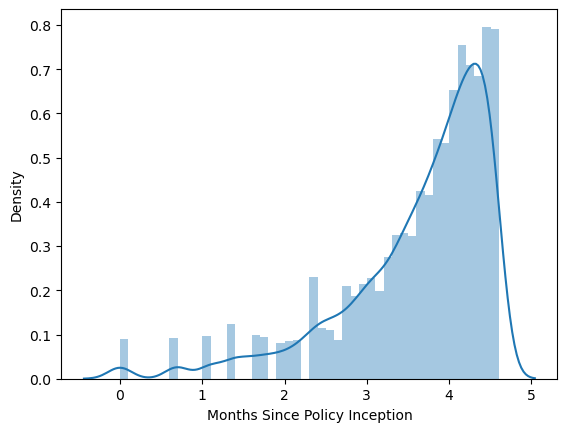

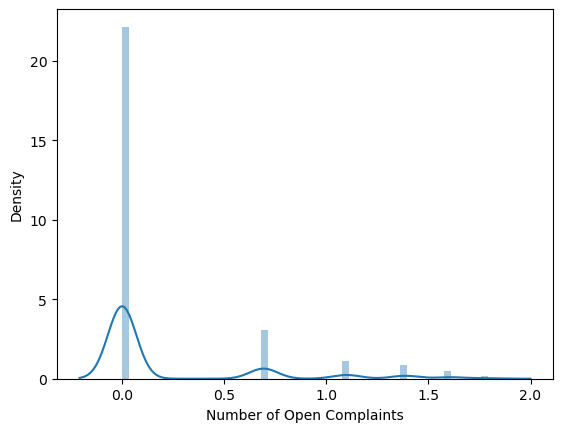

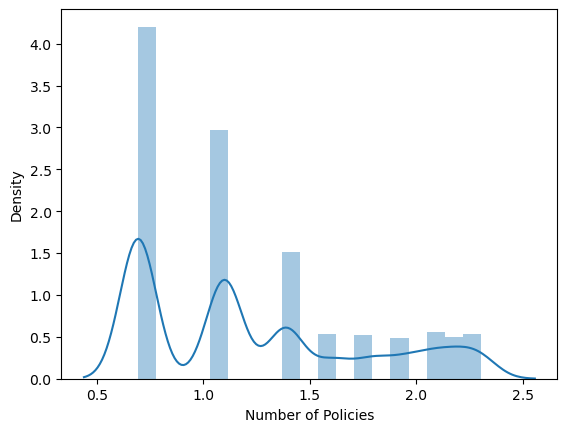

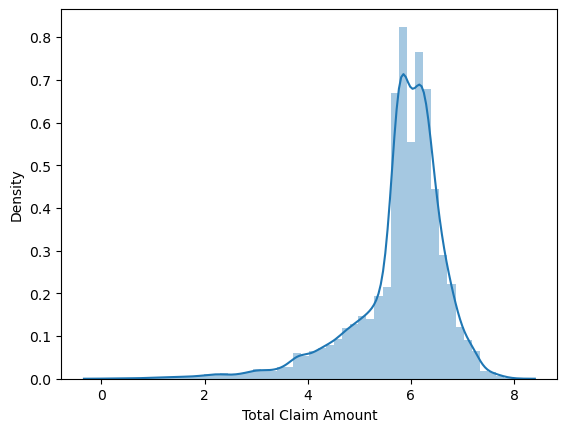

In [6]:
for col in numericals_log.columns:
    sns.distplot(numericals_log[col])
    plt.show()

Customer Lifetime Value: less asymmetrical, data varies less, but still leaning towards higher values with a right skew 
Income: way more exponential distribution
Monthly Premium Auto: exponential distribution, long right skewness, outliers present 
Total Claim Amount: reverted - skew on the left due to outliers with low values 

### Standard scaler

In [7]:
scaler = StandardScaler()
scaler.fit(numerical_df)
numericals_stscaler = scaler.transform(numerical_df)
numericals_stscaler_df = pd.DataFrame(numericals_stscaler, columns=numerical_df.columns)

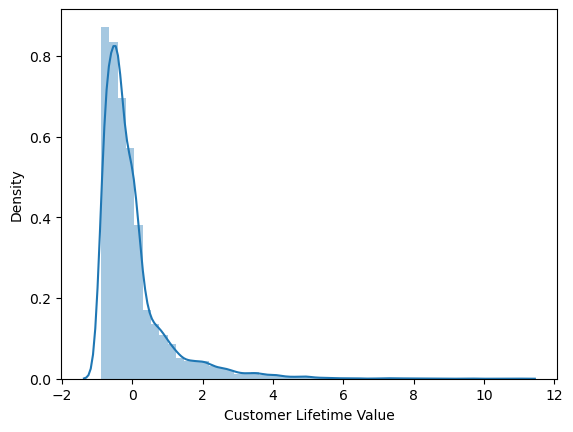

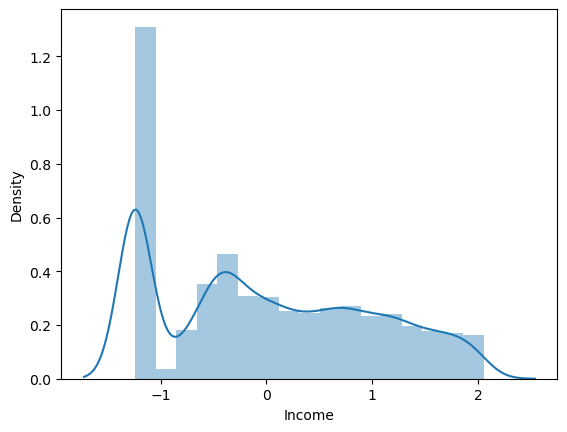

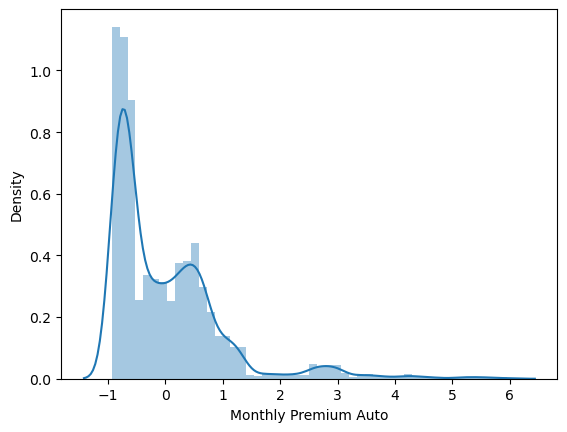

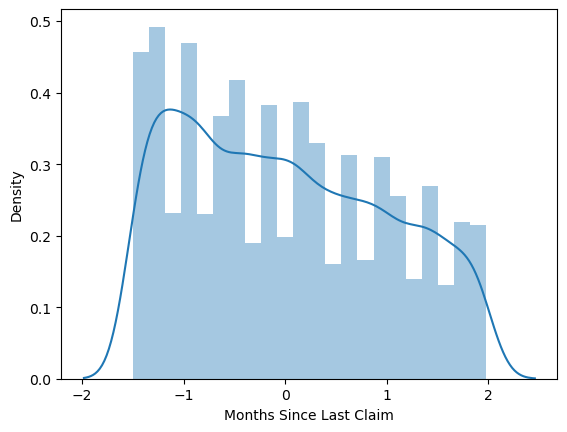

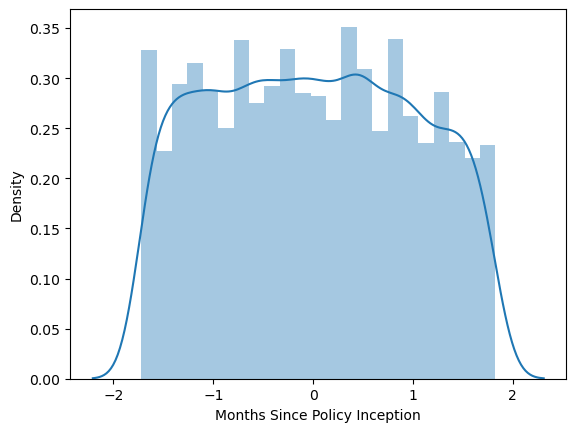

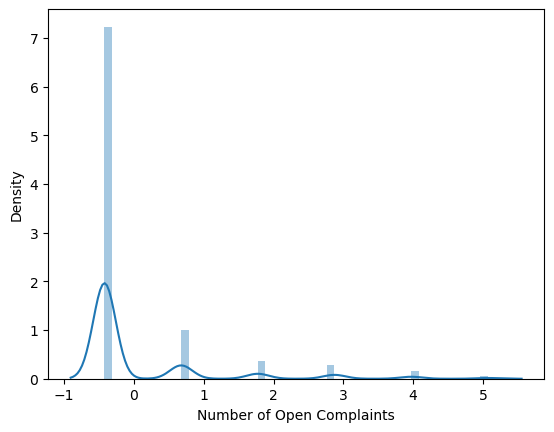

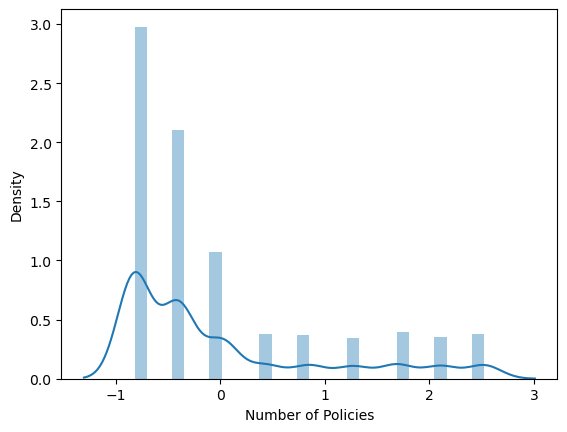

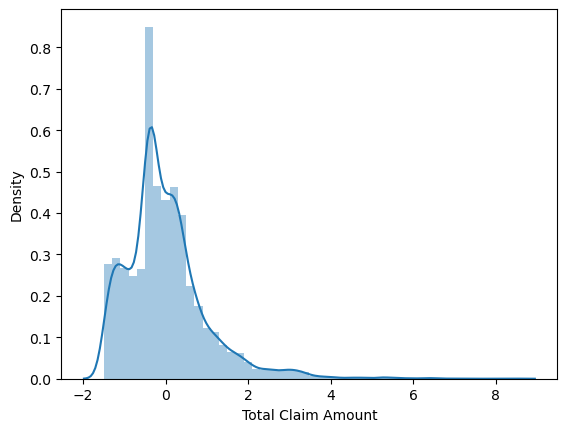

In [8]:
for col in numericals_stscaler_df:
    sns.distplot(numericals_stscaler_df[col])
    plt.show()

Customer Lifetime Value: bell-shaped distribution but asymmetrical with a long right skewness (outliers with high value) 
Income: still exponential due to lots of zeros
Monthly Premium Auto: exponential distribution, long right skewness, outliers present 
Total Claim Amount: normally distributedm central tendency, right skewness observed with outliers of high values

### Normalizer

In [9]:
normalizer = Normalizer()
numericals_normalizer = normalizer.fit_transform(numerical_df)
numericals_normalizer_df = pd.DataFrame(numericals_normalizer, columns=numerical_df.columns)

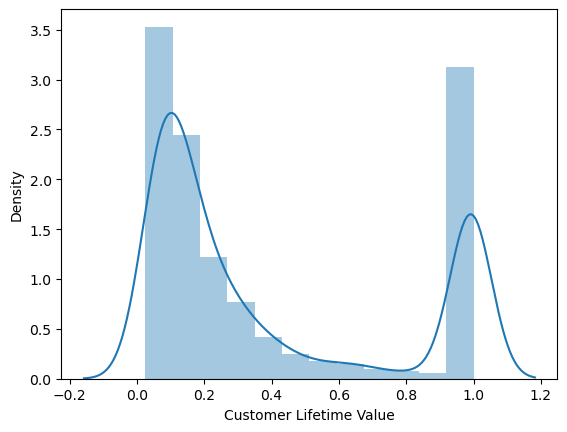

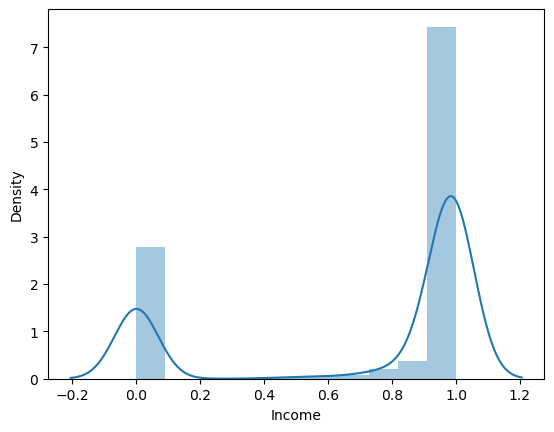

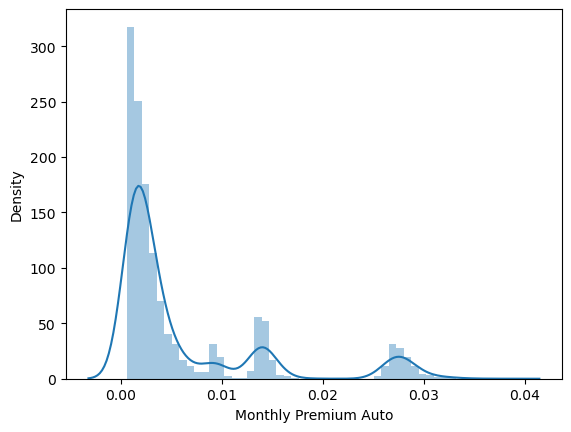

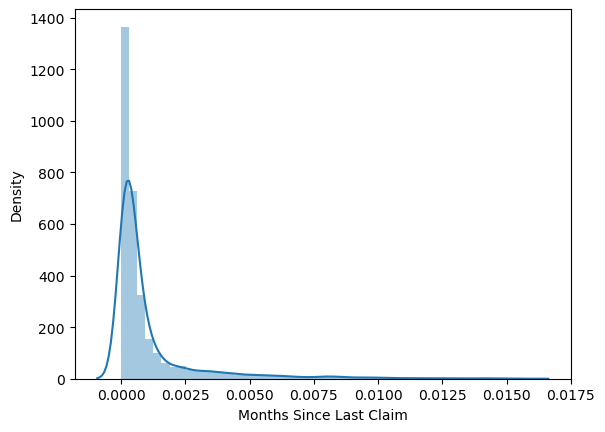

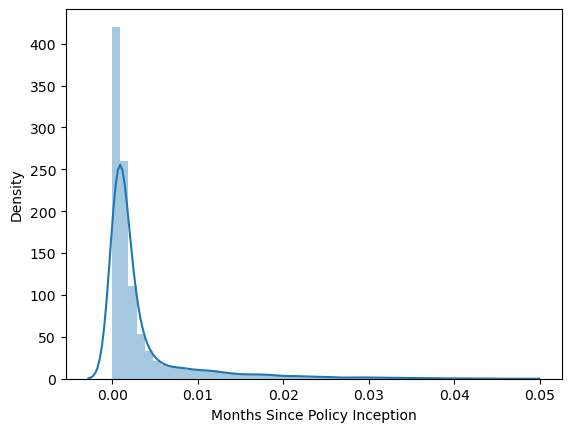

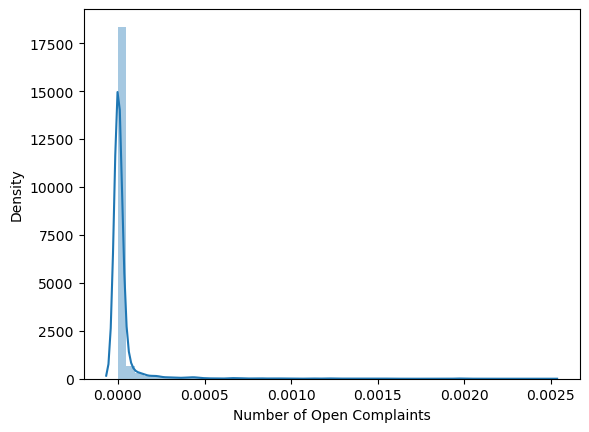

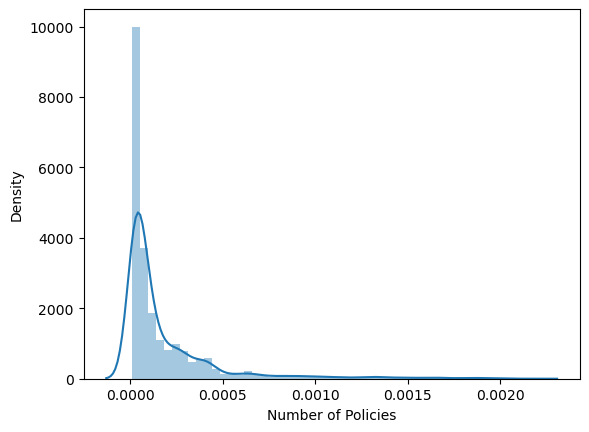

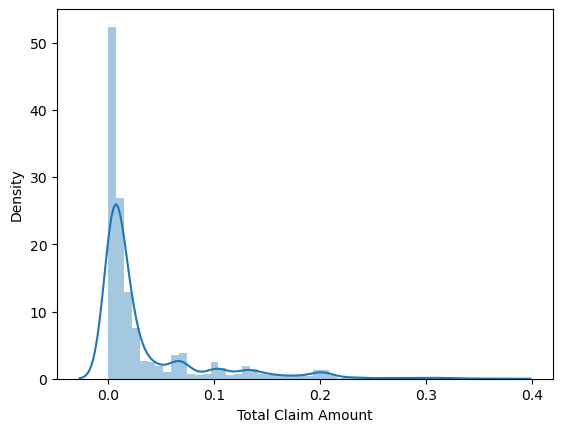

In [10]:
for col in numericals_normalizer_df:
    sns.distplot(numericals_normalizer_df[col])
    plt.show()

Customer Lifetime Value: more exponential distributions - we can see a spike on the right with high values present way more
Income: data varies less, if we ignore zeros, rather a normal distributions
Monthly Premium Auto: high outliers present
Total Claim Amount: bell-shaped distribution but long right skewness, outliers present